# Import libraries

In [170]:
import pandas as pd

In [171]:
import numpy as np

In [172]:
import matplotlib.pyplot as plt

In [173]:
import seaborn as sns

In [174]:
import mllib

# Import data

In [175]:
trainingData = pd.read_csv('csv/trainingData.csv')

In [176]:
validationData = pd.read_csv('csv/validationData.csv')

In [177]:
accuracy_df = pd.read_csv('csv/visualization/accuracy_df.csv')

In [178]:
perfomance_time_cl_df= pd.read_csv('csv/visualization/perfomance_time_cl_df.csv')

In [179]:
regression_models = pd.read_csv('csv/visualization/regression_models.csv')

In [180]:
positions_df_actual_test = pd.read_csv('csv/visualization/positions_df_actual_test.csv',index_col=0)

In [181]:
positions_df_pred_test = pd.read_csv('csv/visualization/positions_df_pred_test.csv',index_col=0)

In [182]:
positions_df_actual_val = pd.read_csv('csv/visualization/positions_df_actual_val.csv',index_col=0)

In [183]:
positions_df_pred_val = pd.read_csv('csv/visualization/positions_df_pred_val.csv',index_col=0)

In [184]:
positions_df_actual_train = pd.read_csv('csv/visualization/positions_df_actual_train.csv',index_col=0)

In [185]:
positions_df_pred_train = pd.read_csv('csv/visualization/positions_df_pred_train.csv',index_col=0)

In [186]:
X_train = pd.read_csv('csv/transformed/X_train.csv',index_col=0)

In [187]:
X_test = pd.read_csv('csv/transformed/X_test.csv',index_col=0)

In [188]:
X_val = pd.read_csv('csv/transformed/X_val.csv',index_col=0)

# Visualization: building, floor

## Accuracy of models

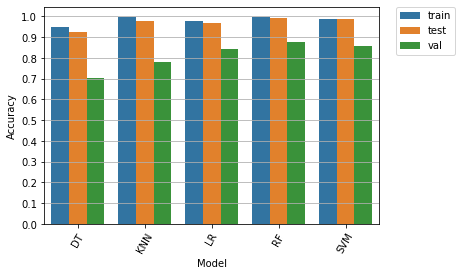

In [189]:
sns.barplot(data = accuracy_df, x = "model", y = "accuracy", 
            hue = "set")
#plt.title('BUILDING: '+ str(building) +' TARGET: '+ target)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(axis='y')
plt.show()

## Training time

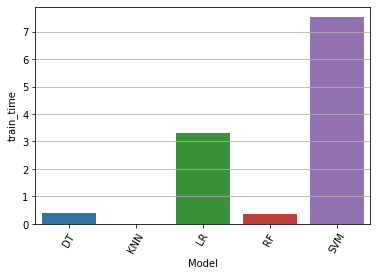

In [190]:
sns.barplot(data = perfomance_time_cl_df, x = "model", y = "train_time")
#plt.title('BUILDING: '+ str(building) +' TARGET: '+ target)
plt.xlabel("Model")
plt.ylabel("train_time")
plt.xticks(rotation = 60)
#plt.yticks(np.arange(0, 1.01, step=0.1))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(axis='y')

# Visualization: lat, long

## MSE, R2

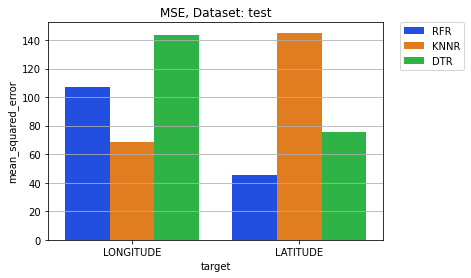

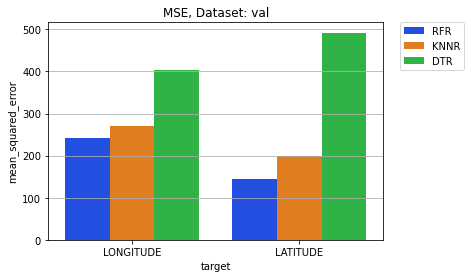

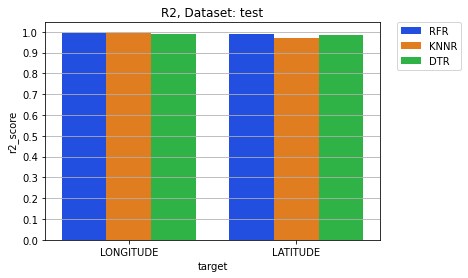

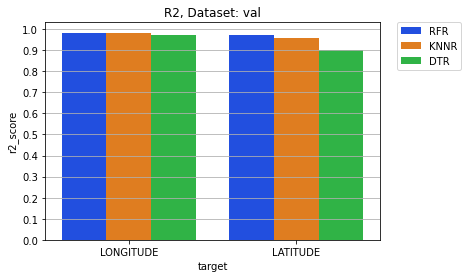

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

for ds in regression_models.dataset.unique():
    
    data = regression_models.query('dataset == @ds')
    # plot MSE
    plt.title('MSE, Dataset: '+ds)
    plt.grid(axis='y')
    sns.barplot(data = data, x = "target", y = "mean_squared_error", 
                hue = "model", palette = "bright")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
for ds in regression_models.dataset.unique():   
    data = regression_models.query('dataset == @ds')
    # plot R2
    plt.title('R2, Dataset: '+ds)
    plt.grid(axis='y')
    plt.yticks(np.arange(0, 1.01, step=0.1))
    sns.barplot(data = data, x = "target", y = "r2_score", 
                hue = "model", palette = "bright")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [192]:
regression_models

,Unnamed: 0,target,model,dataset,mean_squared_error,r2_score,train_time
0,0,LONGITUDE,RFR,test,106.979648,0.993163,0.445050
1,1,LONGITUDE,RFR,val,242.498457,0.983203,0.445050
2,2,LONGITUDE,KNNR,test,68.698855,0.995610,0.016027
3,3,LONGITUDE,KNNR,val,269.667140,0.981321,0.016027
4,4,LONGITUDE,DTR,test,143.143924,0.990852,0.442545
5,5,LONGITUDE,DTR,val,403.856374,0.972027,0.442545
6,6,LATITUDE,RFR,test,45.684249,0.989857,0.739768
7,7,LATITUDE,RFR,val,145.078327,0.970595,0.739768
8,8,LATITUDE,KNNR,test,145.078327,0.970595,0.013495
9,9,LATITUDE,KNNR,val,199.902388,0.959483,0.013495


## Distance error

In [255]:
# calculate distance error and collect data in df
distance_error_models = pd.DataFrame(columns=['model','dataset','distance_error'])
for ds in regression_models.dataset.unique():
    data_ds = regression_models.query('dataset == @ds')
    for mdl in regression_models.model.unique():
        data_ds_mdl = data_ds.query('model == @mdl')
        distance_error = data_ds_mdl['mean_squared_error'].sum()**0.5
        temp_df = pd.DataFrame({'model':[mdl],
                                'dataset':[ds],
                                'distance_error':[distance_error]})

        distance_error_models = distance_error_models.append(temp_df,
                                                             ignore_index=True)

In [256]:
distance_error_models

,model,dataset,distance_error
0,RFR,test,12.355723
1,KNNR,test,14.621121
2,DTR,test,14.796219
3,RFR,val,19.686970
4,KNNR,val,21.669553
5,DTR,val,29.929101


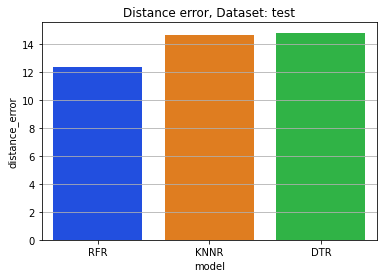

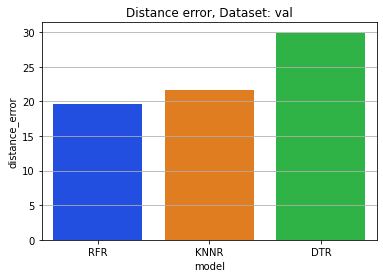

In [197]:
for ds in distance_error_models.dataset.unique(): 
    data = distance_error_models.query('dataset == @ds')
    # plot MSE
    plt.title('Distance error, Dataset: '+ds)
    plt.grid(axis='y')
    sns.barplot(data = data, x = "model", y = "distance_error", 
               palette = "bright")
    plt.show()

## Training time

<AxesSubplot:title={'center':'train_time'}, xlabel='target', ylabel='train_time'>

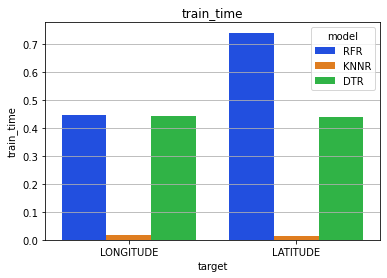

In [198]:
data = regression_models.query('dataset == "test"')
# plot MSE
plt.title('train_time')
plt.grid(axis='y')
sns.barplot(data = data, x = "target", y = "train_time", 
            hue = "model", palette = "bright")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Predicted vs actual position

In [199]:
# absolute distance error of predicted positions TRAIN
positions_df_pred_train['abs_error_distance'] = ((positions_df_actual_train.LONGITUDE-positions_df_pred_train.LONGITUDE)**2+
(positions_df_actual_train.LATITUDE-positions_df_pred_train.LATITUDE)**2)**0.5

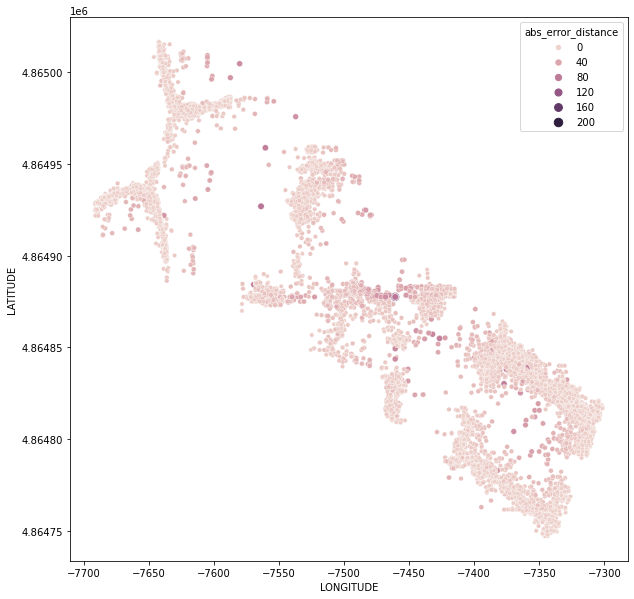

In [200]:
# show all positions of the buildings TRAIN
plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_test, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = positions_df_pred_train,
                x = 'LONGITUDE',
                y = 'LATITUDE',
               hue='abs_error_distance',
               size="abs_error_distance")
plt.show()

In [201]:
# absolute distance error of predicted positions TEST
positions_df_pred_test['abs_error_distance'] = ((positions_df_actual_test.LONGITUDE-positions_df_pred_test.LONGITUDE)**2+
(positions_df_actual_test.LATITUDE-positions_df_pred_test.LATITUDE)**2)**0.5

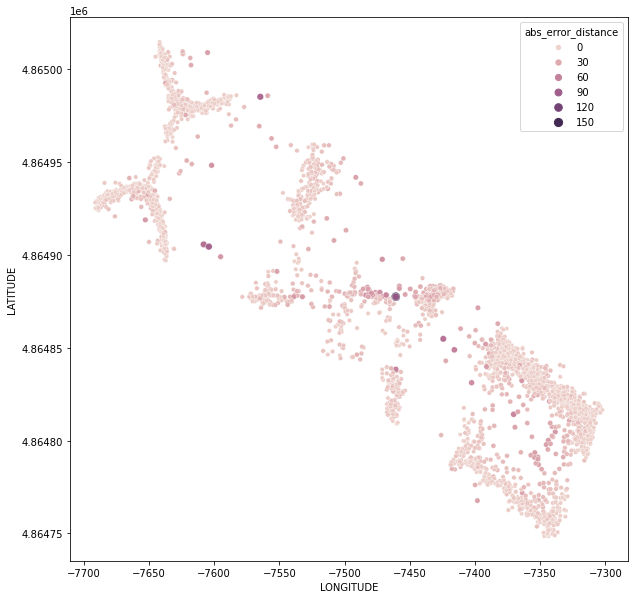

In [202]:
# show all positions of the buildings TEST
plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_test, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = positions_df_pred_test,
                x = 'LONGITUDE',
                y = 'LATITUDE',
               hue='abs_error_distance',
               size="abs_error_distance")
plt.show()

In [203]:
positions_df_actual_test

,index,LONGITUDE,LATITUDE
10528,0,-7559.862900,4.864871e+06
210,1,-7356.978100,4.864761e+06
2485,2,-7376.401000,4.864774e+06
9543,3,-7609.250400,4.864978e+06
12188,4,-7510.211206,4.864949e+06
...,...,...,...
274,3851,-7344.968400,4.864750e+06
9114,3852,-7639.715400,4.865007e+06
12042,3853,-7352.940800,4.864763e+06
8088,3854,-7633.041500,4.864971e+06


In [204]:
# absolute distance error of predicted positions VALIDATION
positions_df_pred_val['abs_error_distance'] = ((positions_df_actual_val.LONGITUDE-positions_df_pred_val.LONGITUDE)**2+
(positions_df_actual_val.LATITUDE-positions_df_pred_val.LATITUDE)**2)**0.5

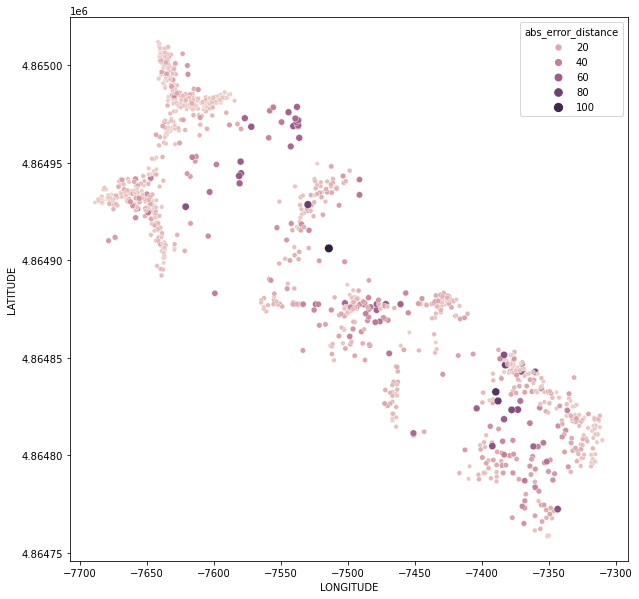

In [205]:
# show all positions of the buildings VALIDATION

plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_val, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = positions_df_pred_val,
                x = 'LONGITUDE',
                y = 'LATITUDE',
                hue='abs_error_distance',
                size="abs_error_distance")
plt.show()

## Error distribution

### Train dataset

Mean: 5.179183144976882   Std: 9.758425888341172


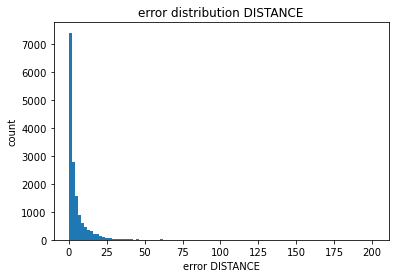

In [206]:
# train
diff_dist_train = positions_df_pred_train['abs_error_distance']
diff_dist_train.index = positions_df_pred_train.index
y = diff_dist_train
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error DISTANCE')
plt.ylabel("count")
plt.title('error distribution DISTANCE')
plt.hist(y, bins = 100)
plt.show()

<AxesSubplot:xlabel='abs_error_distance'>

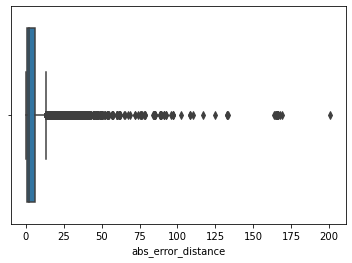

In [207]:
sns.boxplot(x=diff_dist_train)

Mean: -0.0037641576916173643   Std: 9.062779934035962


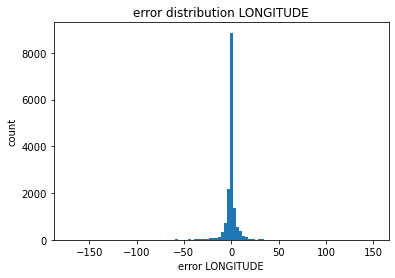

Mean: -0.007816715638277672   Std: 6.318108746112606


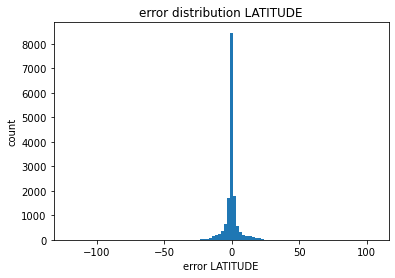

In [208]:
# TEST
diff_long_train = positions_df_actual_train['LONGITUDE'] - positions_df_pred_train['LONGITUDE']
diff_long_train.index = positions_df_actual_train.index
y = diff_long_train
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_train = positions_df_actual_train['LATITUDE'] - positions_df_pred_train['LATITUDE']
diff_lat_train.index = positions_df_actual_train.index
y = diff_lat_train
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

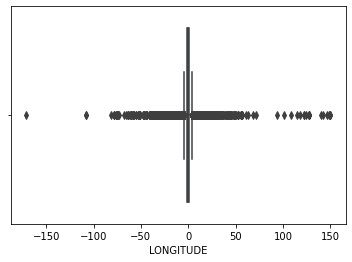

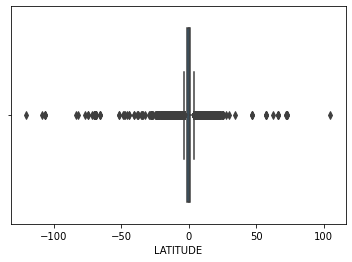

In [209]:
sns.boxplot(x=diff_long_train)
plt.show()
sns.boxplot(x=diff_lat_train)
plt.show()

### Test dataset

Mean: 6.961722208406959   Std: 10.209081749995466


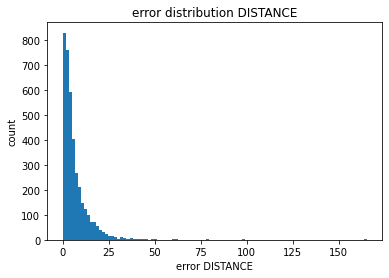

In [210]:
# test
diff_dist_test = positions_df_pred_test['abs_error_distance']
diff_dist_test.index = positions_df_pred_test.index
y = diff_dist_test
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error DISTANCE')
plt.ylabel("count")
plt.title('error distribution DISTANCE')
plt.hist(y, bins = 100)
plt.show()

<AxesSubplot:xlabel='abs_error_distance'>

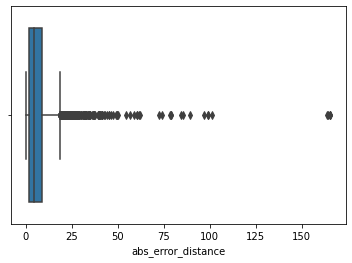

In [211]:
sns.boxplot(x=diff_dist_test)

Mean: 0.18233149418566286   Std: 10.342830643190963


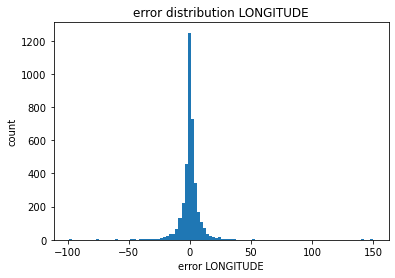

Mean: 0.09037776360736534   Std: 6.759284655101528


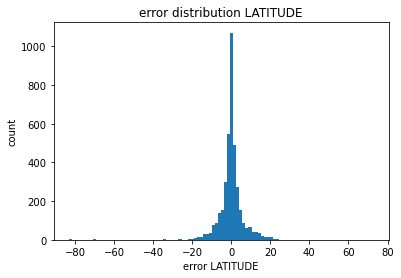

In [212]:
# TEST
diff_long_test = positions_df_actual_test['LONGITUDE'] - positions_df_pred_test['LONGITUDE']
diff_long_test.index = positions_df_actual_test.index
y = diff_long_test
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_test = positions_df_actual_test['LATITUDE'] - positions_df_pred_test['LATITUDE']
diff_lat_test.index = positions_df_actual_test.index
y = diff_lat_test
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

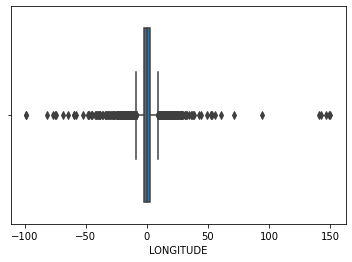

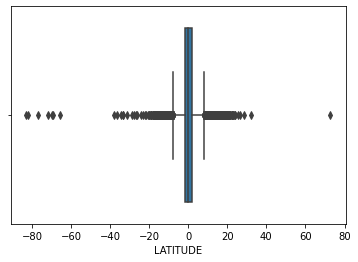

In [213]:
sns.boxplot(x=diff_long_test)
plt.show()
sns.boxplot(x=diff_lat_test)
plt.show()

### Validation dataset

Mean: 14.320263077892774   Std: 13.51559360232875


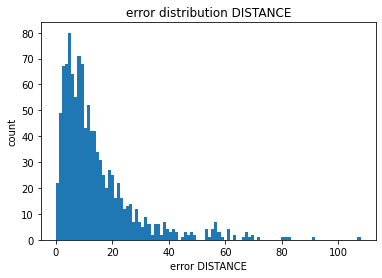

In [214]:
# VALIDATION
diff_dist_val = positions_df_pred_val['abs_error_distance']
diff_dist_val.index = positions_df_pred_val.index
y = diff_dist_val
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error DISTANCE')
plt.ylabel("count")
plt.title('error distribution DISTANCE')
plt.hist(y, bins = 100)
plt.show()

<AxesSubplot:xlabel='abs_error_distance'>

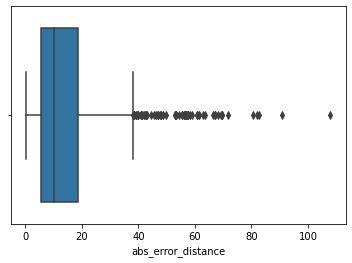

In [215]:
sns.boxplot(x=diff_dist_val)

Mean: -2.8976461367716015   Std: 15.30728607091562


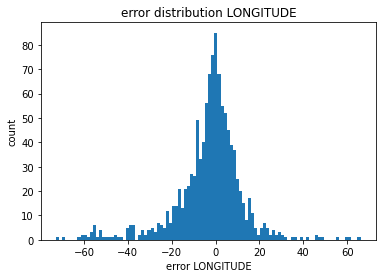

Mean: -1.5589719952774024   Std: 11.94890979267151


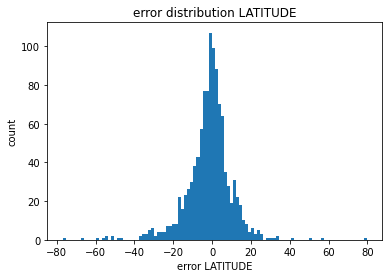

In [216]:
# VALIDATION
diff_long_val = positions_df_actual_val['LONGITUDE'] - positions_df_pred_val['LONGITUDE']
diff_long_val.index = positions_df_actual_val.index
y = diff_long_val
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_val = positions_df_actual_val['LATITUDE'] - positions_df_pred_val['LATITUDE']
diff_lat_val.index = positions_df_actual_val.index
y = diff_lat_val
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

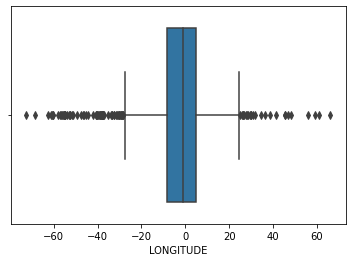

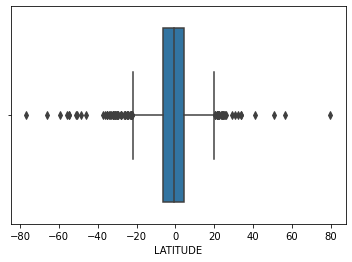

In [217]:
sns.boxplot(x=diff_long_val)
plt.show()
sns.boxplot(x=diff_lat_val)
plt.show()

## Outliers

In [218]:
def getOutlierLimits(data):
    '''
    return lower and higher limits for outliers
    '''
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range,upper_range

### Train data

#### Distance error

In [219]:
lim_train_dist1,lim_train_dist2 = getOutlierLimits(diff_dist_train)

In [220]:
diff_dist_train_df = pd.DataFrame(diff_dist_train)
index_outliers_dist_train  = diff_dist_train_df.query('(abs_error_distance < @lim_train_dist1) or (abs_error_distance>@lim_train_dist2)')

In [221]:
index_outliers_dist_train_ind = index_outliers_dist_train.index

(array([ 25.,   0., 127.,   0.,  15.,   0.,  43.,   0.,  21.,   0.,   9.,
          0., 237.,   0.,  93.,   0.,  73.,   0.,  77.,   0., 286.,   0.,
          3.,   0.,  61.,   0.,  29.,   0.,  12.,   0., 202.,   0., 168.,
          0.,  72.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

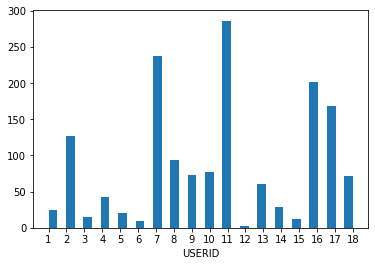

In [222]:
data = trainingData.loc[index_outliers_dist_train_ind,:]
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(data=data, x="USERID",bins=35)

#### Latitude, longitude

In [223]:
lim_train_lat1,lim_train_lat2 = getOutlierLimits(diff_lat_train)

In [224]:
lim_train_long1,lim_train_long2 = getOutlierLimits(diff_long_train)

In [225]:
diff_lat_train_df = pd.DataFrame(diff_lat_train)
index_outliers_lat_train  = diff_lat_train_df.query('(LATITUDE < @lim_train_lat1) or (LATITUDE>@lim_train_lat2)')
diff_long_train_df = pd.DataFrame(diff_long_train)
index_outliers_long_train  = diff_long_train_df.query('(LONGITUDE < @lim_train_long1) or (LONGITUDE>@lim_train_long2)')

In [226]:
# find indexes of ALL outliers
outliers_train_long_ind =  list(index_outliers_long_train.index) 
outliers_train_lat_ind = list(index_outliers_lat_train.index)
outliers_train_ind = list(set(outliers_train_long_ind + outliers_train_lat_ind))

(array([136.,   0., 381.,   0.,  54.,   0., 187.,   0., 164.,   0.,  80.,
          0., 647.,   0., 226.,   0., 282.,   0., 311.,   0., 964.,   0.,
         58.,   0., 133.,   0., 251.,   0., 118.,   0., 471.,   0., 324.,
          0., 225.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

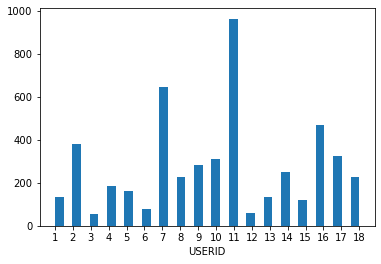

In [227]:
data = trainingData.loc[outliers_train_ind,:]
#plt.xticks(len(data.USERID.sort_values().unique()))
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(data=data, x="USERID",bins=35)

(array([ 122.,    0., 1113.,    0.,  318.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

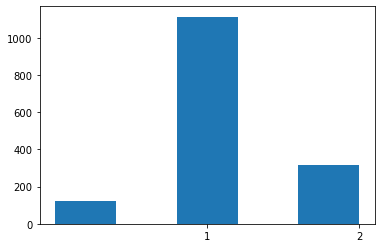

In [228]:
data = trainingData.loc[index_outliers_dist_train_ind,:]
plt.xticks(np.arange(1, 26))
plt.hist(data.BUILDINGID,bins=5)

### Test dataset

#### Distance error

In [229]:
lim_test_dist1,lim_test_dist2 = getOutlierLimits(diff_dist_test)

In [230]:
diff_dist_test_df = pd.DataFrame(diff_dist_test)
index_outliers_dist_test  = diff_dist_test_df.query('(abs_error_distance < @lim_test_dist1) or (abs_error_distance>@lim_test_dist2)')

In [231]:
index_outliers_dist_test = index_outliers_dist_test.index

(array([ 6.,  0., 15.,  0.,  1.,  0.,  4.,  0., 12.,  0.,  2.,  0., 41.,
         0., 21.,  0.,  8.,  0., 14.,  0., 44.,  0.,  4.,  0.,  7.,  0.,
         5.,  0.,  7.,  0., 31.,  0., 30.,  0., 15.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

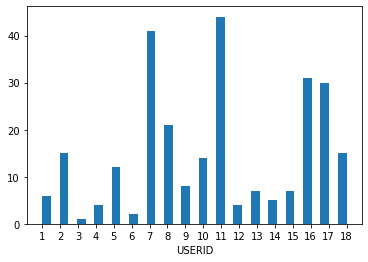

In [232]:
data = trainingData.loc[index_outliers_dist_test_ind,:]
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(data=data, x="USERID",bins=35)

(array([ 27.,   0., 150.,   0.,  90.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

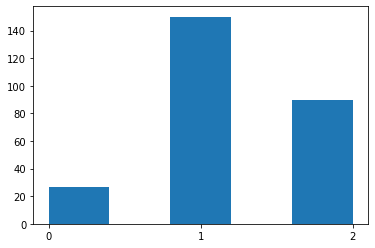

In [233]:
data = trainingData.loc[index_outliers_dist_test,:]
plt.xticks( np.arange(0, 3))
plt.hist(data=data, x="BUILDINGID",bins=5)

#### Latitude, longitude

In [234]:
lim_test_lat1,lim_test_lat2 = getOutlierLimits(diff_lat_test)

In [235]:
lim_test_long1,lim_test_long2 = getOutlierLimits(diff_long_test)

In [236]:
diff_lat_test_df = pd.DataFrame(diff_lat_test)
index_outliers_lat_test  = diff_lat_test_df.query('(LATITUDE < @lim_test_lat1) or (LATITUDE>@lim_test_lat2)')
diff_long_test_df = pd.DataFrame(diff_long_test)
index_outliers_long_test  = diff_long_test_df.query('(LONGITUDE < @lim_test_long1) or (LONGITUDE>@lim_test_long2)')



Lets try to find out a common pattern for all outliers (by lattitude and by longitude)

In [237]:
# find indexes of ALL outliers
outliers_test_long_ind =  list(index_outliers_long_test.index) 
outliers_test_lat_ind = list(index_outliers_lat_test.index)
outliers_test_ind = list(set(outliers_test_long_ind + outliers_test_lat_ind))

(array([ 19.,   0.,  62.,   0.,   9.,   0.,  25.,   0.,  25.,   0.,  11.,
          0., 135.,   0.,  44.,   0.,  43.,   0.,  56.,   0., 153.,   0.,
         19.,   0.,  28.,   0.,  24.,   0.,  27.,   0.,  86.,   0.,  66.,
          0.,  44.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

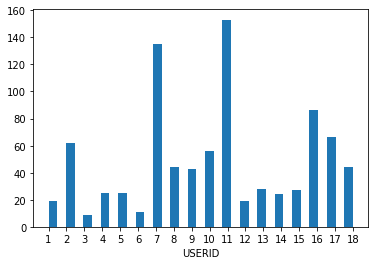

In [238]:
data = trainingData.loc[outliers_test_ind,:]
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(data=data, x="USERID",bins=35)

(array([ 83.,   0., 489.,   0., 304.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

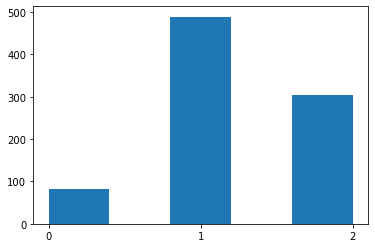

In [239]:
data = trainingData.loc[outliers_test_ind,:]
plt.xticks( np.arange(0, 3))
plt.hist(data=data, x="BUILDINGID",bins=5)

### Validation data

#### Distance error

In [240]:
lim_val_dist1,lim_val_dist2 = getOutlierLimits(diff_dist_val)

In [241]:
diff_dist_val_df = pd.DataFrame(diff_dist_val)
index_outliers_dist_val  = diff_dist_val_df.query('(abs_error_distance < @lim_val_dist1) or (abs_error_distance>@lim_val_dist2)')

In [242]:
index_outliers_dist_val = index_outliers_dist_val.index

In validationData USERID is not given!

In [243]:
# data = validationData.loc[index_outliers_dist_val,:]
# plt.xticks( np.arange(1, 19))
# plt.xlabel('USERID')
# plt.hist(data=data, x="USERID",bins=19)

#### Latitude, longitude

In [244]:
lim_val_lat1,lim_val_lat2 = getOutlierLimits(diff_lat_val)

In [245]:
lim_val_long1,lim_val_long2 = getOutlierLimits(diff_long_val)

In [246]:
diff_lat_val_df = pd.DataFrame(diff_lat_val)
index_outliers_lat_val  = diff_lat_val_df.query('(LATITUDE < @lim_val_lat1) or (LATITUDE>@lim_val_lat2)')
diff_long_val_df = pd.DataFrame(diff_long_val)
index_outliers_long_val  = diff_long_val_df.query('(LONGITUDE < @lim_val_long1) or (LONGITUDE>@lim_val_long2)')

In [247]:
# find indexes of ALL outliers
outliers_val_long_ind =  list(index_outliers_long_val.index) 
outliers_val_lat_ind = list(index_outliers_lat_val.index)
outliers_val_ind = list(set(outliers_val_long_ind + outliers_val_lat_ind))

In [248]:
len(outliers_val_ind)

139

In [249]:
# data = validationData.loc[outliers_val_ind,:]
# #plt.xticks(len(data.USERID.sort_values().unique()))
# #plt.xticks( np.arange(1, 19) )
# plt.hist(data=data, x="USERID",bins=35)

(array([29.,  0.,  0., 18.,  0.,  0., 22.]),
 array([0.        , 0.28571429, 0.57142857, 0.85714286, 1.14285714,
        1.42857143, 1.71428571, 2.        ]),
 <BarContainer object of 7 artists>)

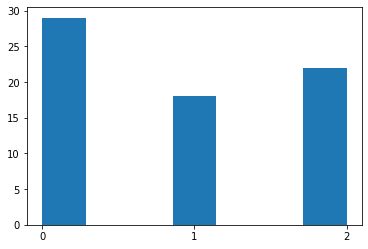

In [250]:
data = validationData.loc[index_outliers_dist_val,:]
plt.xticks( np.arange(0, 3))
plt.hist(data=data, x="BUILDINGID",bins=7)